In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from IPython import display
warnings.filterwarnings('ignore')

In [29]:
# f1 = 2x+3y  f2 = 3x+2y
def fitness_function(x,y):
    return [(2*x)+(3*y), (2*y)+(3*x)]

def add_noise(x,y):
    clean_fitness = fitness_function(x,y)
    return [clean_fitness[0] + (2*np.random.randn(1) + 0),clean_fitness[1] + (2*np.random.randn(1) + 0)]

def add_robust_noise(x,y):
    x_1 = x + (2*np.random.randn(1) + 0)
    y_1 = y + (2*np.random.randn(1) + 0)
    fitness = fitness_function(x_1,y_1)
    return fitness


def display_error_approximation(x,y,N,robust=False):
    fitnesses = []
    actual_fitness = fitness_function(x,y)
    for i in range(N):
        if(robust==False):
            fitness = add_noise(x,y)
        else:
            fitness = add_robust_noise(x,y)
        fitnesses.append(fitness)
        plt.gca().cla()
        plt.scatter(actual_fitness[0],actual_fitness[1],color='green')
        plt.scatter([i[0] for i in fitnesses],[i[1] for i in fitnesses],color='red')
        plt.xlabel('objective 1')
        plt.ylabel('objective 2')
        plt.grid()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1)
    display.clear_output()
    
    plt.scatter([i[0] for i in fitnesses],[i[1] for i in fitnesses],color='blue',label='Samples')
    plt.scatter(sum([i[0] for i in fitnesses])/N,sum([i[1] for i in fitnesses])/N,color='orange',label='Estimate')
    plt.scatter(actual_fitness[0],actual_fitness[1],color='green',label='Actual Fitness')
    plt.legend()
    #plt.grid()
    plt.show()

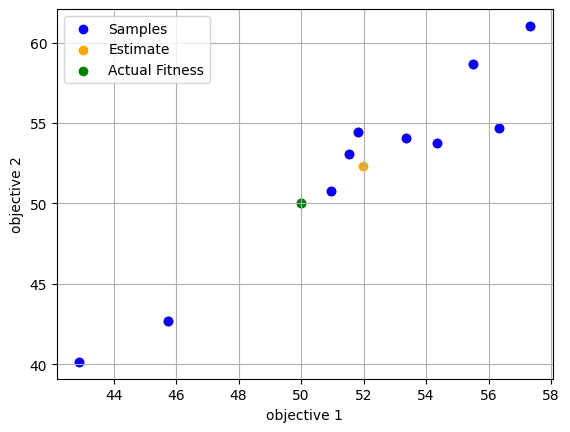

In [30]:
x = 10
y = 10
display_error_approximation(x,y,10,robust=True)
